In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer,InterclusterDistance
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv('data_auth.csv',skipinitialspace=True)

In [3]:
features = data[data.columns[:-1]]
labels = data['Auth']


            A1        A2         A3        A4
0     3.621600   8.66610  -2.807300 -0.446990
1     4.545900   8.16740  -2.458600 -1.462100
2     3.866000  -2.63830   1.924200  0.106450
3     3.456600   9.52280  -4.011200 -3.594400
4     0.329240  -4.45520   4.571800 -0.988800
5     4.368400   9.67180  -3.960600 -3.162500
6     3.591200   3.01290   0.728880  0.564210
7     2.092200  -6.81000   8.463600 -0.602160
8     3.203200   5.75880  -0.753450 -0.612510
9     1.535600   9.17720  -2.271800 -0.735350
10    1.224700   8.77790  -2.213500 -0.806470
11    3.989900  -2.70660   2.394600  0.862910
12    1.899300   7.66250   0.153940 -3.110800
13   -1.576800  10.84300   2.546200 -2.936200
14    3.404000   8.72610  -2.991500 -0.572420
15    4.676500  -3.38950   3.489600  1.477100
16    2.671900   3.06460   0.371580  0.586190
17    0.803550   2.84730   4.343900  0.601700
18    1.447900  -4.87940   8.342800 -2.108600
19    5.242300  11.02720  -4.353000 -4.101300
20    5.786700   7.89020  -2.61960

In [4]:
train_set, test_set, train_labels, test_labels = train_test_split(features, labels,test_size=0.4,random_state=42)

In [5]:
scaler = StandardScaler()
scaler.fit(train_set)
train_set_scaler = scaler.transform(train_set)

In [6]:
scaler.fit(test_set)
test_set_scaler = scaler.transform(test_set)

In [7]:
one_hot = OneHotEncoder()

train_labels_hot = one_hot.fit_transform(train_labels.values.reshape(-1, 1)).todense()
test_labels_hot = one_hot.transform(test_labels.values.reshape(-1, 1)).todense()

C:\Users\Teng\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [8]:
#k-means

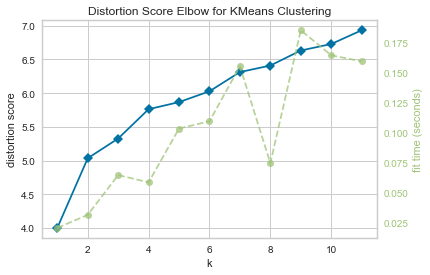

In [9]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(train_set_scaler)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [10]:
#Exptation Maximization

In [11]:
score = []
for i in range(1,12,1):
    gmm = GaussianMixture(n_components=i).fit(train_set_scaler)
    score += [gmm.score(train_set_scaler)]


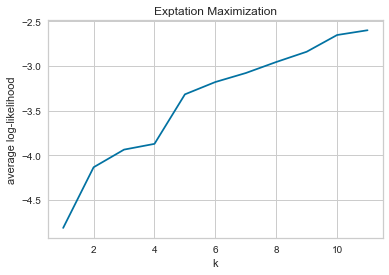

In [12]:
x = range(1,12,1)
plt.title('Exptation Maximization')
plt.plot(x,score,color= 'b',label='Train')
plt.xlabel('k')
plt.ylabel('average log-likelihood')
plt.show()

In [13]:
# dimensionality reduction algorithms


In [14]:
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif

In [15]:
# PCA

In [16]:
pca = PCA(n_components=2, random_state=42)
pca.fit(train_set_scaler)
#explained_variance_ratio = pca.explained_variance_ratio_
#singular_values = pca.singular_values_
pca_train = pca.fit_transform(train_set_scaler)

Text(0.5, 1.0, 'Orignal Scatter Plot')

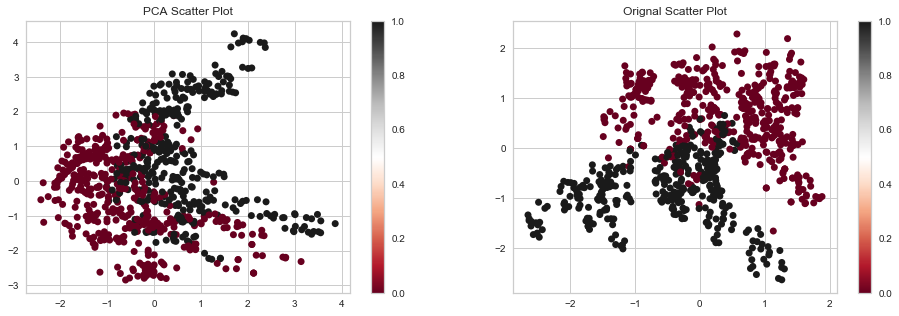

In [17]:
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.scatter(pca_train[:,1],pca_train[:,0],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('PCA Scatter Plot')

plt.subplot(122)
plt.scatter(train_set_scaler[:,1],train_set_scaler[:,0],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Orignal Scatter Plot')

In [18]:
# ICA

In [26]:
ica = FastICA(n_components=2,random_state=42)
ica.fit(train_set_scaler)
ica_train = ica.fit_transform(train_set_scaler)   

C:\Users\Teng\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Teng\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Text(0.5, 1.0, 'Orignal Scatter Plot')

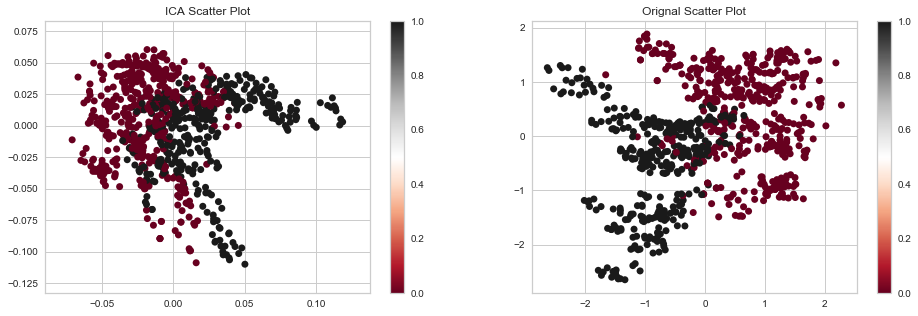

In [27]:
i = 0
j = 1
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.scatter(ica_train[:,i],ica_train[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('ICA Scatter Plot')

plt.subplot(122)
plt.scatter(train_set_scaler[:,i],train_set_scaler[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Orignal Scatter Plot')

In [28]:
# Random Projection

In [29]:
rp = GaussianRandomProjection(n_components=2,random_state=42)
rp_train = rp.fit_transform(train_set_scaler)   

In [30]:
rp_train.shape

(823, 2)

Text(0.5, 1.0, 'Orignal Scatter Plot')

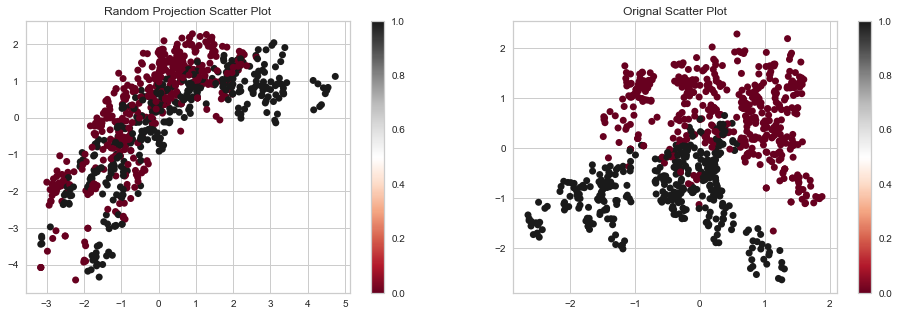

In [31]:
i = 1
j = 0
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.scatter(rp_train[:,i],rp_train[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Random Projection Scatter Plot')

plt.subplot(122)
plt.scatter(train_set_scaler[:,i],train_set_scaler[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Orignal Scatter Plot')

In [32]:
# Select K Best


In [33]:
kbest_train = SelectKBest(mutual_info_classif, k=2).fit_transform(train_set_scaler,train_labels)

Text(0.5, 1.0, 'Orignal Scatter Plot')

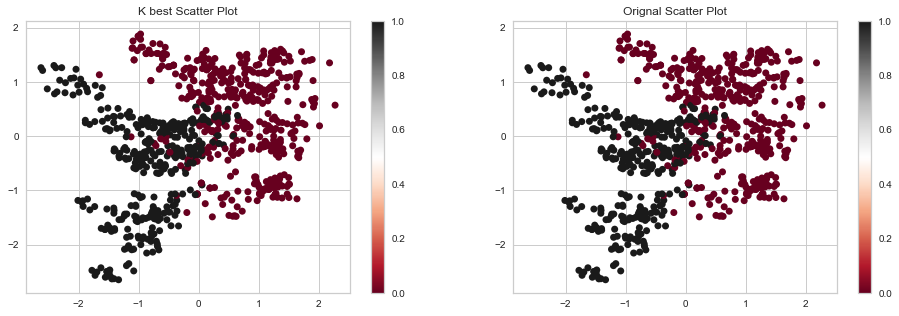

In [34]:
i = 0
j = 1
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.scatter(kbest_train[:,i],kbest_train[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('K best Scatter Plot')

plt.subplot(122)
plt.scatter(train_set_scaler[:,i],train_set_scaler[:,j],  c = train_labels, cmap = "RdGy",
            edgecolor = "None")
plt.colorbar()
plt.title('Orignal Scatter Plot')

In [35]:
# Reprpduce Clustering Experiment

In [36]:
# Kmeans

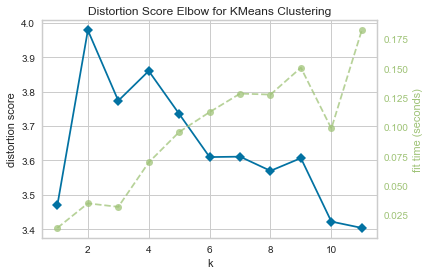

In [37]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))


visualizer.fit(pca_train)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [38]:
pca_km = KMeans(n_clusters=5,random_state=42)
pca_km_set = pca_km.fit_transform(pca_train)
pca_km_labels = pca_km.labels_

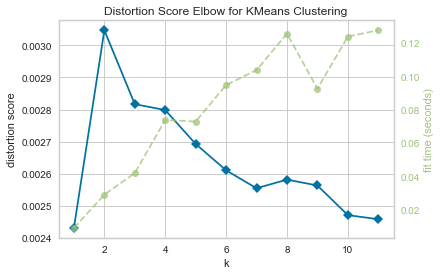

In [39]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(ica_train)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [40]:
ica_km = KMeans(n_clusters=5,random_state=42)
ica_km_set = ica_km.fit_transform(ica_train)
ica_km_labels = ica_km.labels_

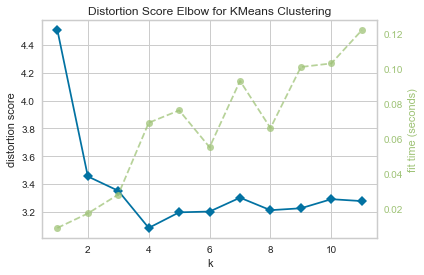

In [41]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(rp_train)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [42]:
rp_km = KMeans(n_clusters=5,random_state=42)
rp_km_set = rp_km.fit_transform(rp_train)
rp_km_labels = rp_km.labels_

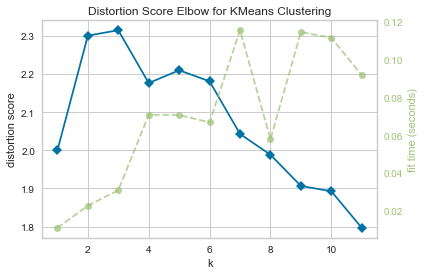

In [43]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(kbest_train)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [44]:
kbest_km = KMeans(n_clusters=5,random_state=42)
kbest_km_set = kbest_km.fit_transform(kbest_train)
kbest_km_labels = kbest_km.labels_

In [45]:
# Exptation Maximization

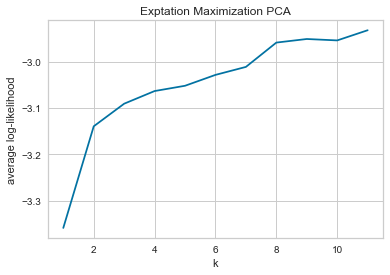

In [46]:
score = []
for i in range(1,12,1):
    gmm = GaussianMixture(n_components=i).fit(pca_train)
    score += [gmm.score(pca_train)]
x = range(1,12,1)
plt.title('Exptation Maximization PCA')
plt.plot(x,score,color= 'b',label='Train')
plt.xlabel('k')
plt.ylabel('average log-likelihood')
plt.show()

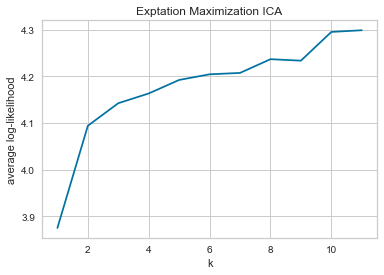

In [47]:
score = []
for i in range(1,12,1):
    gmm = GaussianMixture(n_components=i).fit(ica_train)
    score += [gmm.score(ica_train)]
x = range(1,12,1)
plt.title('Exptation Maximization ICA')
plt.plot(x,score,color= 'b',label='Train')
plt.xlabel('k')
plt.ylabel('average log-likelihood')
plt.show()

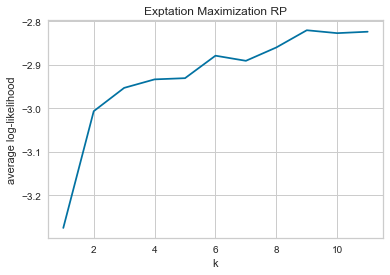

In [48]:
score = []
for i in range(1,12,1):
    gmm = GaussianMixture(n_components=i).fit(rp_train)
    score += [gmm.score(rp_train)]
x = range(1,12,1)
plt.title('Exptation Maximization RP')
plt.plot(x,score,color= 'b',label='Train')
plt.xlabel('k')
plt.ylabel('average log-likelihood')
plt.show()

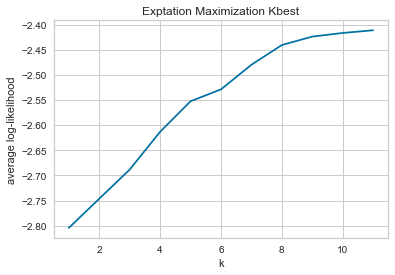

In [49]:
score = []
for i in range(1,12,1):
    gmm = GaussianMixture(n_components=i).fit(kbest_train)
    score += [gmm.score(kbest_train)]
x = range(1,12,1)
plt.title('Exptation Maximization Kbest')
plt.plot(x,score,color= 'b',label='Train')
plt.xlabel('k')
plt.ylabel('average log-likelihood')
plt.show()

In [50]:
# Neural Network

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,average_precision_score
from sklearn.model_selection import cross_val_score,GridSearchCV, learning_curve
from timeit import default_timer as timer

In [52]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [53]:
mlp1 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp1.fit(train_set_scaler,train_labels)
end = timer()
print(mlp1.score(train_set_scaler, train_labels))
print('fit time :')
print(end - start) 

0.9975698663426489
fit time :
0.6818711559999997


<module 'matplotlib.pyplot' from 'C:\\Users\\Teng\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

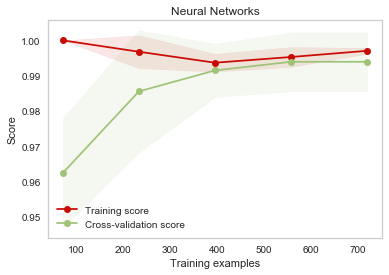

In [54]:
plot_learning_curve(mlp1,'Neural Networks',train_set_scaler,train_labels,cv=8)

In [55]:
mlp2 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp2.fit(pca_train,train_labels)
end = timer()
print(mlp2.score(pca_train, train_labels))
print('fit time :')
print(end - start) 

0.7982989064398542
fit time :
0.7754698089999579


<module 'matplotlib.pyplot' from 'C:\\Users\\Teng\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

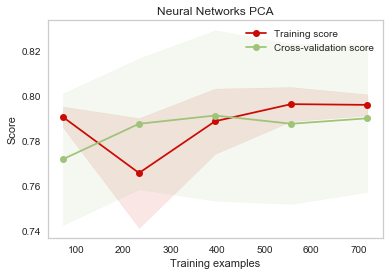

In [56]:
plot_learning_curve(mlp2,'Neural Networks PCA',pca_train,train_labels,cv=8)

In [57]:
mlp3 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp3.fit(ica_train,train_labels)
end = timer()
print(mlp3.score(ica_train, train_labels))
print('fit time :')
print(end - start) 

0.5577156743620899
fit time :
0.08750612700004012


<module 'matplotlib.pyplot' from 'C:\\Users\\Teng\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

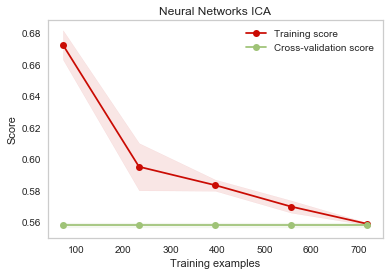

In [58]:
plot_learning_curve(mlp3,'Neural Networks ICA',ica_train,train_labels,cv=8)

In [59]:
mlp4 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp4.fit(rp_train,train_labels)
end = timer()
print(mlp4.score(rp_train, train_labels))
print('fit time :')
print(end - start) 

0.715674362089915
fit time :
0.6417793120000397


<module 'matplotlib.pyplot' from 'C:\\Users\\Teng\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

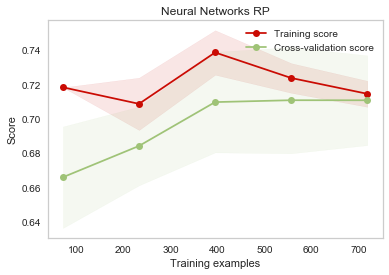

In [60]:
plot_learning_curve(mlp4,'Neural Networks RP',rp_train,train_labels,cv=8)

In [61]:
mlp5 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp5.fit(kbest_train,train_labels)
end = timer()
print(mlp5.score(kbest_train, train_labels))
print('fit time :')
print(end - start) 

0.9295261239368166
fit time :
0.9695206819999953


<module 'matplotlib.pyplot' from 'C:\\Users\\Teng\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

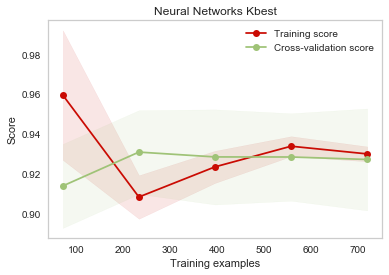

In [62]:
plot_learning_curve(mlp5,'Neural Networks Kbest',kbest_train,train_labels,cv=8)

In [63]:
#  Neural Network after clustering and feature selection

In [64]:
mlp6 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp6.fit(pca_km_set,pca_km_labels)
end = timer()
print(mlp6.score(pca_km_set,pca_km_labels))
print('fit time :')
print(end - start) 

0.9963547995139733
fit time :
2.8245346429999927


<module 'matplotlib.pyplot' from 'C:\\Users\\Teng\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

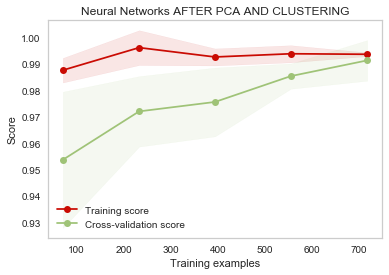

In [65]:
plot_learning_curve(mlp6,'Neural Networks AFTER PCA AND CLUSTERING',pca_km_set,pca_km_labels,cv=8)

In [66]:
mlp7 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp7.fit(ica_km_set,ica_km_labels)
end = timer()
print(mlp7.score(ica_km_set,ica_km_labels))
print('fit time :')
print(end - start) 

0.9890643985419199
fit time :
2.579282820000003


<module 'matplotlib.pyplot' from 'C:\\Users\\Teng\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

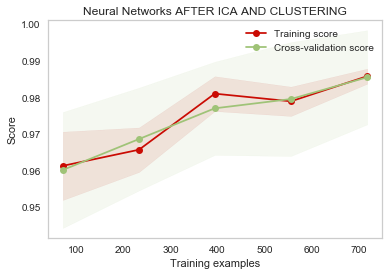

In [67]:
plot_learning_curve(mlp7,'Neural Networks AFTER ICA AND CLUSTERING',ica_km_set,ica_km_labels,cv=8)

In [68]:
mlp8 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp8.fit(rp_km_set,rp_km_labels)
end = timer()
print(mlp8.score(rp_km_set,rp_km_labels))
print('fit time :')
print(end - start) 

0.982989064398542
fit time :
2.9540461240000013


<module 'matplotlib.pyplot' from 'C:\\Users\\Teng\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

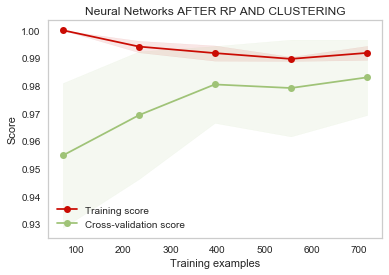

In [69]:
plot_learning_curve(mlp8,'Neural Networks AFTER RP AND CLUSTERING',rp_km_set,rp_km_labels,cv=8)

In [70]:
mlp9 = MLPClassifier(hidden_layer_sizes=10,alpha=0.01,max_iter=8000,random_state=42)
start = timer()
mlp9.fit(kbest_km_set,kbest_km_labels)
end = timer()
print(mlp9.score(kbest_km_set,kbest_km_labels))
print('fit time :')
print(end - start) 

0.9963547995139733
fit time :
2.30664315599995


<module 'matplotlib.pyplot' from 'C:\\Users\\Teng\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

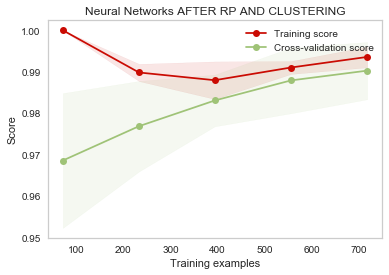

In [71]:
plot_learning_curve(mlp9,'Neural Networks AFTER RP AND CLUSTERING',kbest_km_set,kbest_km_labels,cv=8)